# Homework 6: 

**DUE:** 5pm EST, April 9, 2020



### **Conceptual:** Short answer questions. Be concise

---

1. Let us consider the "curse of dimensionality" (i.e., when the ratio of predictor variables, p, to observations, n, is high) in the context of kNN. Answer the following:

<br>

(a) Suppose that we have a set of observations, each with measurements on p = 1 feature, X. We assume that X is uniformly (evenly) distributed between 0 and 1. Associated with each observation is a response value. Suppose that we wish to predict a test observation’s response using only observations that are within 10% of the range of X closest to that test observation. For instance, in order to predict the response for a test observation with X = 0.6, we will use observations in the range [0.55,0.65]. On average, what fraction of the available observations will we use to make the prediction?

**Answer:**

$0.1$

(b) Suppose that we have a set of observations, each with measurements on p = 2 features, X1 and X2. We assume that (X1,X2) are uniformly distributed between 0 and 1. We wish to predict a test observation’s response using only observations that are within 10% of the range of X1 and within 10% of the range of X2 closest to that test observation. For instance, in order to predict the response for a test observation with X1 = 0.6 and X2 = 0.35, we will use observations in the range [0.55, 0.65] for X1 and in the range [0.3, 0.4] for X2. On average, what fraction of the available observations will we use to make the prediction?

**Answer:**

$0.1 ^ 2 = 0.01 $

(c) Now suppose that we have a set of observations on p = 100 features. Again the observations are uniformly distributed on each feature, and again each feature ranges in value from 0 to 1. We wish to predict a test observation’s response using observations within the 10% of each feature’s range that is closest to that test observation. What fraction of the available observations will we use to make the prediction?

**Answer:**

$0.1 ^{100} $


(c)  Using your answers to parts (a)–(c), argue that a drawback of KNN when p is large is that there are very few training observations “near” any given test observation.

**Answer:**

As the answers above show, when p increases, the fraction of the available observations used to make the prediction becomes exponentially smaller. When p is very large, very few training observations will be considered as being "near" the test observation.

---

2. Explain how k-fold cross-validation is implemented. What are the advantages and disadvantages of k-fold cross-validation relative to LOOCV?



**Answer:**
- How: 
    1. Divide all observations into k groups, each group has $\frac{n}{k}$ observations
    2. Selected one of these k-folds as testing set. Take it out, make the remaining observations the new dataset. 
    3. Fit the new dataset with the model. 
    4. Using the testing set to calculate the model's residula errors and the predicted values. 
    5. repeat 1-4 for all k-folds 
    6. Evaluate the model based on the residual errors across all k groups and the correlations between the predicted values and the observed values 
    
- Advantage relative to LOOCV
    - Computationally cheaper: if dataset has a lot of the observations, it will take a very long time for LOOCV to iterate through all of them. 
    - Lower variance: less overlap between the training data, so the model trained using k-fold is more generalizable than LOOCV.
    
- Disadvantage relative to LOOCV
    - More biased: when k < n, there are going to be less observations in each folds, and make the estimates more biased than LOOCV. 

---

3. Differentiate the bootstrap from a permutation test. Describe each and when is it appropriate to each.

**Answer:**

- Bootstrap: 
    - Calculate the test of interests in original dataset 
    - Run m iterations. Each time randomly draw n observations from the dataset. This is a sampling with replacement procedure so observations would be drawn more than once. 
    - Calculate the distributional parameters across all iterations, estimate the confidence intervals to see the statistics of the real test of interests
   
- Permutation 
    - Calculate the test of interests in original dataset 
    - Permute across the comparisons 
    - For each different permutation, run the test of interests again 
    - Calculate the probability of seeing the original test's statistics in all permutations 


- Comparison: 
    - Bootstrap is sampling with replacement, Permutation is sampling without replacement. The former uses each observation more than once, the latter only once. 
    - Bootstrap is good for calculating confidence intervals, it evaluates the variability in the sampling process; Permutation is good for testing hypotheses. It tests hypothesis along one specific dimension, so it works the best when there is a very specific hypothesis. 

---

### **Applied:** Show your code & plots

We will use both datasets from the HCP dataset for these problems. Include conceptual answers to questions as comments in code cells. You should use the tidyverse and class libraries for this assignment, as well as the data table for the HCP data set.

In [106]:
library(tidyverse)
library(class)
hcp_data <- read.csv("/Users/caoanjie/Desktop/Spring2020/DS/_DSPN_S20/hw6/unrestricted_trimmed_1_7_2020_10_50_44.csv")
hcp_data

Subject,Release,Acquisition,Gender,Age,MMSE_Score,PSQI_Score,PSQI_Comp1,PSQI_Comp2,PSQI_Comp3,...,Noise_Comp,Odor_Unadj,Odor_AgeAdj,PainIntens_RawScore,PainInterf_Tscore,Taste_Unadj,Taste_AgeAdj,Mars_Log_Score,Mars_Errs,Mars_Final
100004,S900,Q06,M,22-25,29,8,1,2,2,...,5.2,101.12,86.45,2,45.9,107.17,105.31,1.80,0,1.80
100206,S900,Q11,M,26-30,30,6,1,1,1,...,6.0,108.79,97.19,1,49.7,72.63,72.03,1.84,0,1.84
100307,Q1,Q01,F,26-30,29,4,1,0,1,...,3.6,101.12,86.45,0,38.6,71.69,71.76,1.76,0,1.76
100408,Q3,Q03,M,31-35,30,4,1,1,0,...,2.0,108.79,98.04,2,52.6,114.01,113.59,1.76,2,1.68
100610,S900,Q08,M,26-30,30,4,1,1,0,...,2.0,122.25,110.45,0,38.6,84.84,85.31,1.92,1,1.88
101006,S500,Q06,F,31-35,28,2,1,1,0,...,6.0,122.25,111.41,0,38.6,123.80,123.31,1.80,0,1.80
101107,S500,Q06,M,22-25,29,9,1,1,3,...,6.8,108.79,97.19,1,50.1,134.65,131.38,1.84,0,1.84
101208,S1200,Q12,F,31-35,30,6,1,2,0,...,4.4,101.12,87.11,1,50.1,105.57,102.32,1.92,0,1.92
101309,S500,Q06,M,26-30,29,5,1,1,2,...,5.2,122.25,110.45,0,38.6,106.39,104.39,1.80,0,1.80
101410,S500,Q06,M,26-30,29,8,1,2,2,...,6.8,122.25,111.41,3,50.1,73.86,71.78,1.80,0,1.80


4. Use kNN to build a classifier that for predicting Gender using the unadjusted Flanker task performance (Flanker_unadj). 

(a) Split the data set up into 1206 training observations and 200 test observations. Clasffiy using kNN with k = 5. Show your classification accuracy as a predicted vs. observed table, and report the mean classification accuracy.

the mean classification accuracy is 98.5%

In [71]:
# -------------------------------
# Question 4
# -------------------------------
set.seed(8)
# recode Gender, Female is 1, Male is 0 
hcp_data <- hcp_data %>% select(Gender, Flanker_Unadj)  %>% na.omit()  %>% mutate(Gender = ifelse(Gender == "F", 1, 0))
count(hcp_data)

#Splitting up the dataset 
rand <- sample(x=1206, size = 200)
hcp_test <- hcp_data[rand, ]  
hcp_train <- hcp_data[-rand, ]  

#Get the target category
hcp_gender_target <- hcp_train  %>% pull(Gender)
hcp_gender_test <- hcp_test  %>% pull(Gender)

# (a)
knn_result <- knn(hcp_train, hcp_test, hcp_gender_target, k = 5)
table <- table(knn_result,hcp_gender_test)
table


n
1206


          hcp_gender_test
knn_result   0   1
         0  90   3
         1   0 107

In [72]:
accuracy <- sum(diag(table)/(sum(rowSums(table)))) * 100
accuracy

[1] 98.5

(b) Now repeat your analysis using a range of k's, from 1-100. Plot the performance of the classifier (i.e., accuracy) for each value of k. Which value gives you the highest accuracy and what is the accuracy for that best k?

when k = 1, we have the highest accuracy 99%

In [ ]:
repeat_analysis <- function(n_simulations, alpha, sample_size, natural_mu, natural_sd, chimera_mu, chimera_sd) {
  p.values <- NULL 
  for (i in 1:n_simulations) {
    data <- simulate_data(sample_size, natural_mu, natural_sd, chimera_mu, chimera_sd) 
    p.value <- run_t_test(data) 
    p.values <- c(p.values, p.value) 
  }
  power <- mean(p.values <= alpha)
  return(list(power = power, p.values = p.values)) 
}


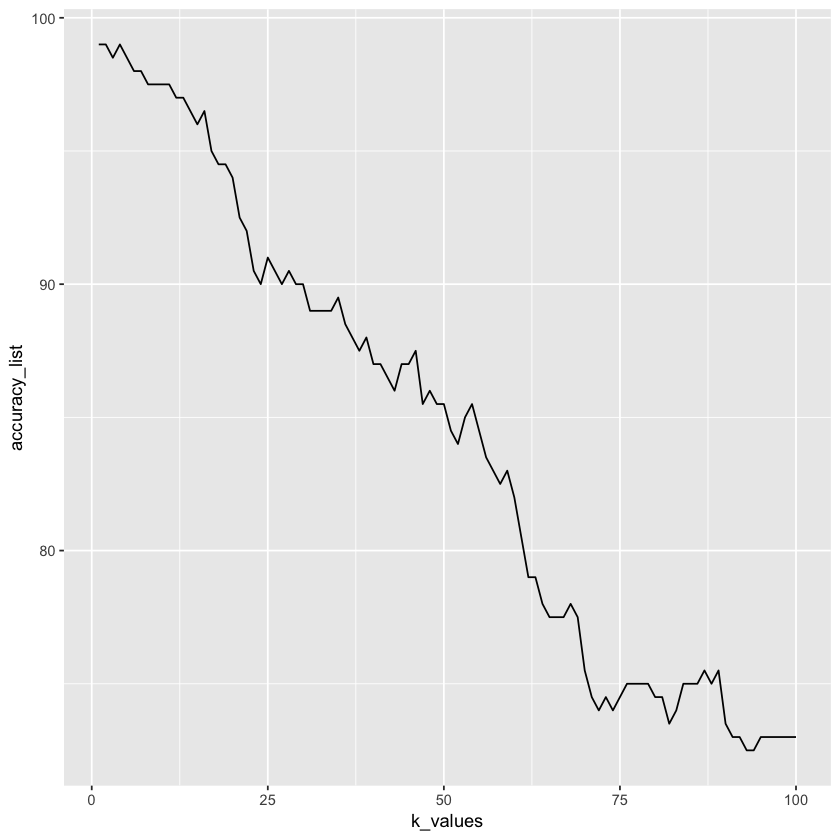

In [82]:
# (b)
calculate_accuracy <- function(table){
    acc <- sum(diag(table)/(sum(rowSums(table)))) * 100
    return(acc)
}


repeat_knn <- function(rangeOfk, training, testing, target, test_target){
    accuracy_list <- NULL
    k_value_list <- NULL
    for (i in 1:rangeOfk){
        knn_result <- knn(training, testing, target, k = i)
        tab <- table(knn_result,test_target)
        accuracy <- calculate_accuracy(tab)
        k_value_list <- c(k_value_list, i)
        accuracy_list <- c(accuracy_list, accuracy)
    }
    
    return (map2_dfr(k_value_list, accuracy_list, ~ tibble(k_values = .x, accuracy_list = .y)))

}

knn_range <- repeat_knn(100, hcp_train, hcp_test,hcp_gender_target,hcp_gender_test)
ggplot(knn_range, aes(x=k_values, y=accuracy_list)) + 
geom_line()

In [86]:
knn_range[which.max(knn_range$accuracy_list),]

k_values,accuracy_list
1,99


5. Use bootstrapping to estimate the confidence on the regression coefficients for a logistic regression model using Flanker_unadj scores to predict Gender. Use 5000 iterations off the bootstrap. Report whether any of the coefficients are statistically significant using the standard error estimates off of the bootstrap.

both the intercept and the coefficient for Flanker_unadj scores are significant. None of the 95% contains 0. 

In [88]:
library(boot)

In [117]:
# -------------------------------
# Question 5
# -------------------------------
hcp_data <- read.csv("/Users/caoanjie/Desktop/Spring2020/DS/_DSPN_S20/hw6/unrestricted_trimmed_1_7_2020_10_50_44.csv")
hcp_data <- hcp_data %>% select(Gender, Flanker_Unadj)  %>% na.omit()  %>% mutate(Gender = ifelse(Gender == "F", 1, 0))


boot_fn <- function(dataset, index){
    return (coef(glm(Gender~Flanker_Unadj,data=dataset,subset = index, family=binomial(link='logit'))))
}

boot_obj <- boot(hcp_data,boot_fn,R=5000)


In [122]:
print(boot_obj)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = hcp_data, statistic = boot_fn, R = 5000)


Bootstrap Statistics :
       original        bias    std. error
t1*  3.44174036  0.0280519285  0.68881162
t2* -0.02931477 -0.0002504948  0.00612518


In [131]:
boot.ci(boot_obj, index=2)

Warning message in boot.ci(boot_obj, index = 2):
“bootstrap variances needed for studentized intervals”


BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 5000 bootstrap replicates

CALL : 
boot.ci(boot.out = boot_obj, index = 2)

Intervals : 
Level      Normal              Basic         
95%   (-0.0411, -0.0171 )   (-0.0408, -0.0167 )  

Level     Percentile            BCa          
95%   (-0.0419, -0.0179 )   (-0.0414, -0.0172 )  
Calculations and Intervals on Original Scale

In [132]:
boot.ci(boot_obj, index=1)

Warning message in boot.ci(boot_obj, index = 1):
“bootstrap variances needed for studentized intervals”


BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 5000 bootstrap replicates

CALL : 
boot.ci(boot.out = boot_obj, index = 1)

Intervals : 
Level      Normal              Basic         
95%   ( 2.064,  4.764 )   ( 2.040,  4.737 )  

Level     Percentile            BCa          
95%   ( 2.147,  4.843 )   ( 2.090,  4.805 )  
Calculations and Intervals on Original Scale